In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df = df.drop(['Name', 'PassengerId'], axis=1)

In [5]:
df.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [6]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [7]:
df['Destination'] = df['Destination'].fillna('N/A')

In [8]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'N/A'], dtype=object)

In [9]:
dummies = pd.get_dummies(df['Destination'], prefix='Dest')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Destination', axis=1)
df

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dest_55 Cancri e,Dest_N/A,Dest_PSO J318.5-22,Dest_TRAPPIST-1e
0,Europa,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
1,Earth,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,True
2,Europa,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,False,False,True
3,Europa,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,False,False,True
4,Earth,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False
8689,Earth,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False
8690,Earth,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,True
8691,Europa,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False


In [10]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [11]:
df['HomePlanet'] = df['HomePlanet'].fillna('N/A')
dummies = pd.get_dummies(df['HomePlanet'], prefix='HomePlanet')
df = pd.concat([df, dummies], axis=1)
df = df.drop('HomePlanet', axis=1)
df

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dest_55 Cancri e,Dest_N/A,Dest_PSO J318.5-22,Dest_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_N/A
0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,True,False,False
1,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,True,True,False,False,False
2,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,False,False,True,False,True,False,False
3,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,False,False,True,False,True,False,False
4,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False,False,True,False,False
8689,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False,True,False,False,False
8690,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,True,True,False,False,False
8691,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False,False,True,False,False


In [12]:
df[['deck', 'num', 'side']] = df['Cabin'].str.split('/', expand=True)
df = df.drop('Cabin', axis=1)
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dest_55 Cancri e,Dest_N/A,Dest_PSO J318.5-22,Dest_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_N/A,deck,num,side
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,True,False,False,B,0,P
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,True,True,False,False,False,F,0,S
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,False,False,True,False,True,False,False,A,0,S
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,False,False,True,False,True,False,False,A,0,S
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,True,True,False,False,False,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False,False,True,False,False,A,98,P
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False,True,False,False,False,G,1499,S
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,True,True,False,False,False,G,1500,S
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False,False,True,False,False,E,608,S


In [13]:
df['deck'] = df['deck'].fillna('N/A')
dummies = pd.get_dummies(df['deck'], prefix='Deck')
df = pd.concat([df, dummies], axis=1)
df = df.drop('deck', axis=1)
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dest_55 Cancri e,...,side,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N/A,Deck_T
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,P,False,True,False,False,False,False,False,False,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,...,S,False,False,False,False,False,True,False,False,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,...,S,True,False,False,False,False,False,False,False,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,...,S,True,False,False,False,False,False,False,False,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,...,S,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,True,...,P,True,False,False,False,False,False,False,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,S,False,False,False,False,False,False,True,False,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,...,S,False,False,False,False,False,False,True,False,False
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,True,...,S,False,False,False,False,True,False,False,False,False


In [14]:
df['side'] = df['side'].apply(lambda x: True if x == 'P' else False)

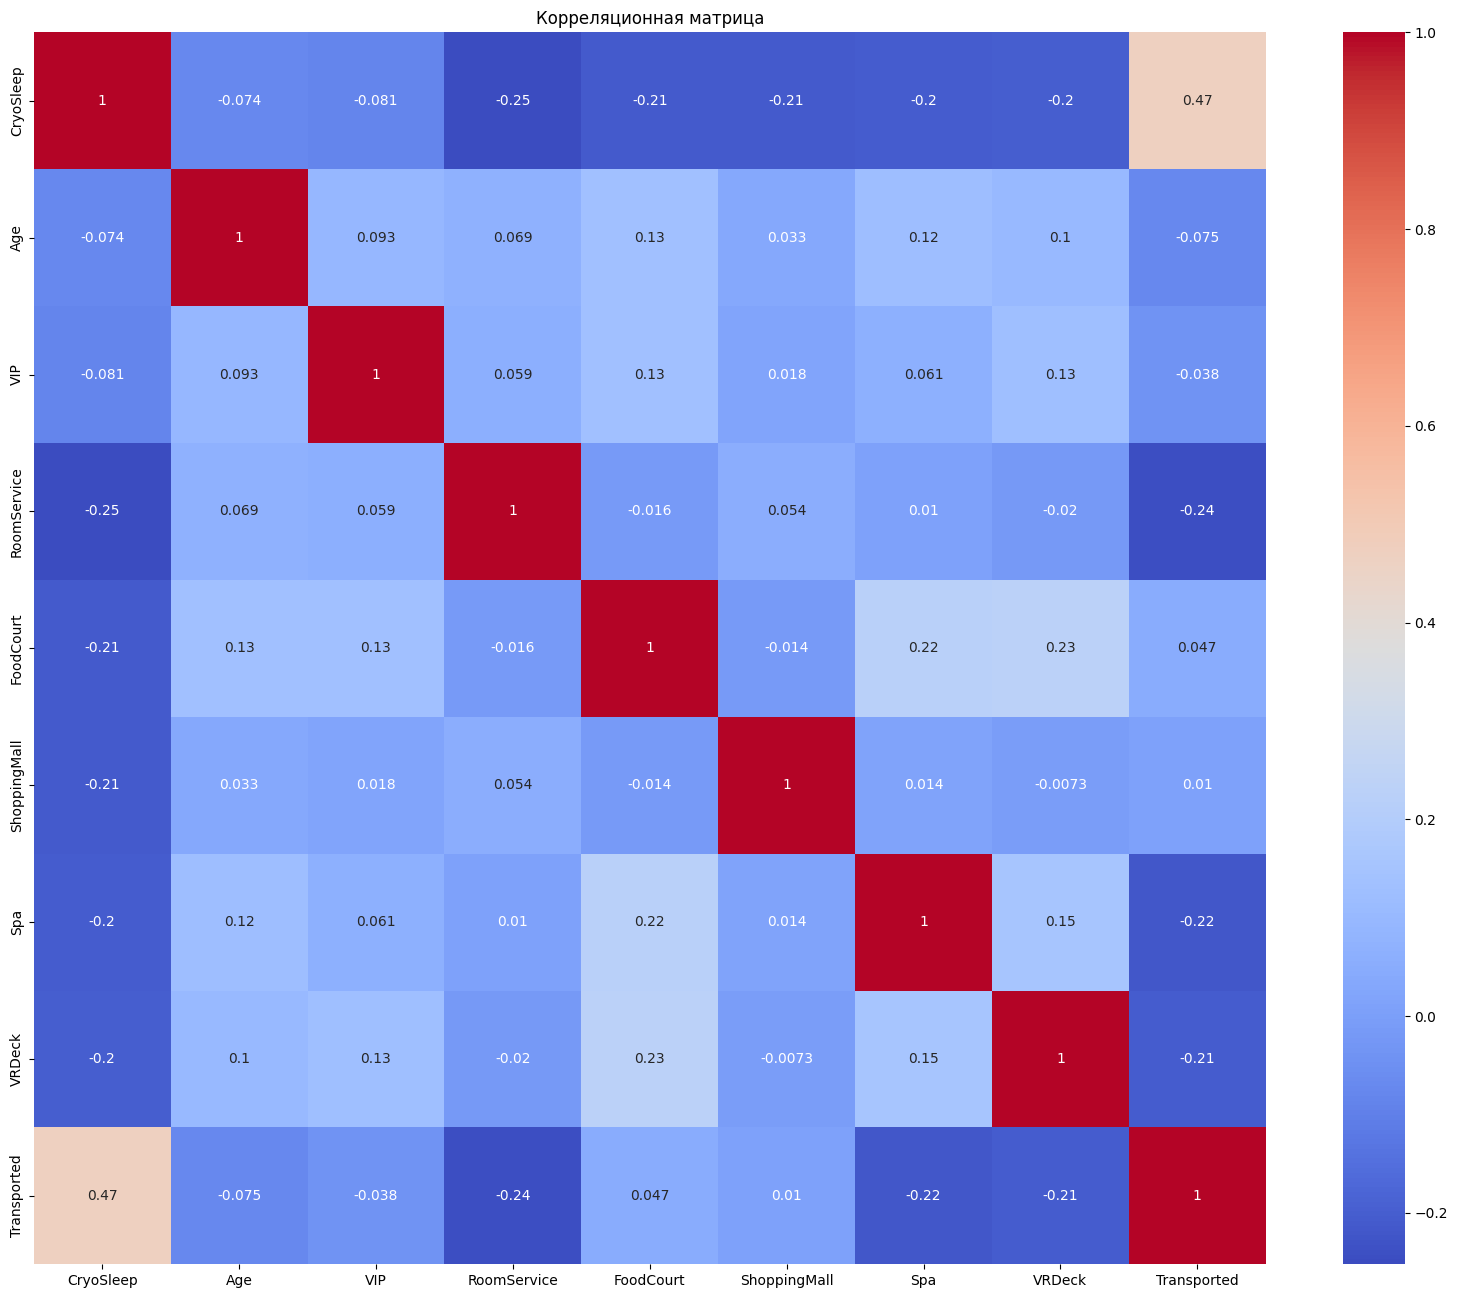

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()